In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [2]:
DATASET_URL = "./iris.data"
FEATURES = [
	"sepal_length",
	"sepal_width",
	"petal_length",
	"petal_width"
]
LABEL = "species"
COLUMNS = FEATURES + [LABEL]
DTYPE={
	"sepal_length": "float32",
	"sepal_width": "float32",
	"petal_length": "float32",
	"petal_width": "float32",
	"species": "category"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=150
BATCH_SIZE=50
SEED=1
COLUMNS

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [3]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float32 
 1   sepal_width   150 non-null    float32 
 2   petal_length  150 non-null    float32 
 3   petal_width   150 non-null    float32 
 4   species       150 non-null    category
dtypes: category(1), float32(4)
memory usage: 2.6 KB


In [6]:
# Missing values
data = data.dropna()
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02
mean,-4.793207e-09,0.000000,-1.030664e-08,3.469177e-09
std,1.003350e+00,1.003350,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987,-1.568735e+00,-1.444450e+00
25%,-9.006813e-01,-0.587764,-1.227541e+00,-1.181504e+00
50%,-5.250584e-02,-0.124958,3.362660e-01,1.332259e-01
75%,6.745013e-01,0.569251,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684,1.786341e+00,1.710902e+00


In [8]:
data = data.astype(dtype=DTYPE)
data.dtypes

sepal_length     float32
sepal_width      float32
petal_length     float32
petal_width      float32
species         category
dtype: object

In [9]:
# Set categories
for feature in FEATURES:
	if data[feature].dtype.name == "category":
		categories=data[feature].unique()
		data[feature] = data[feature].astype(pd.CategoricalDtype(categories=categories))
		print(data[feature].cat.categories.tolist())

In [10]:
# Class Balance
data[LABEL].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
# Label Encode
labelencoder = preprocessing.LabelEncoder()
data[LABEL] = labelencoder.fit_transform(data[LABEL])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [12]:
data[LABEL].nunique()

3

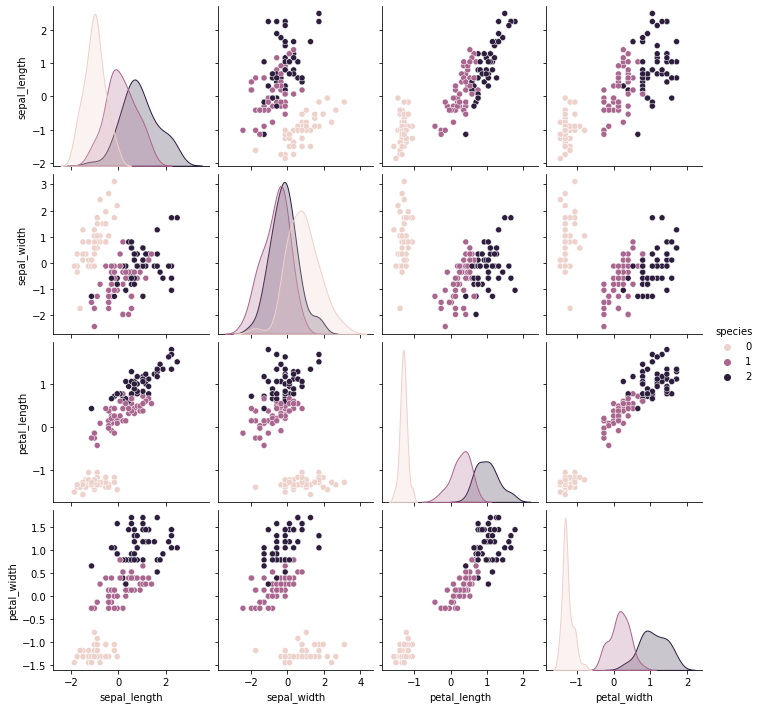

In [13]:
sns.pairplot(data.sample(n=150, random_state=1), hue=LABEL)

In [14]:
target = data.pop(LABEL)
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [15]:
data = pd.get_dummies(data, dtype="float32")
data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553334,-1.281973,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800655,0.933356,1.447956


In [16]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)